In [1]:
!pip install ngauge

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.spatial import ConvexHull
import progressbar

In [3]:
import ngauge

In [4]:
ngauge.Neuron.from_swc

<function ngauge.Neuron.Neuron.from_swc(fname, force_format=True)>

In [5]:
from glob import glob

In [6]:
files = glob( '20181003_export/*' )
files = [ ngauge.Neuron.from_swc(x) for x in files ]

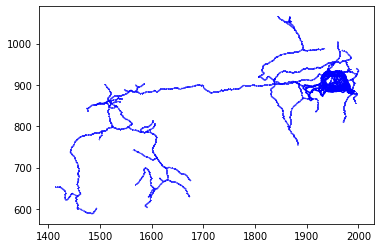

In [7]:
files[0].plot()

In [8]:
import numpy as np

In [9]:
points = []

for f in files:
    ap = [ x for x in f.iter_all_points() ]
    toadd = np.zeros( shape=( len(ap), 3), dtype=np.float32 )
    for i in range( len( ap ) ):
        toadd[i][0] = ap[i].x
        toadd[i][1] = ap[i].y
        toadd[i][2] = ap[i].z
    points.append( toadd )

In [10]:
import tifffile

In [11]:
img = tifffile.memmap( '/home/loganaw/Downloads/20181003_3L_ExM_TRH-5FP_20x_tile1-4.tif' )
img.shape # Z C Y X

(320, 5, 2919, 2959)

In [12]:
out = np.zeros( shape=(img.shape[3], img.shape[2], img.shape[0]), dtype=np.uint8 )
out.shape

(2959, 2919, 320)

In [13]:
import mask_accelerated

In [14]:
for i in range( len( points ) ):
    hull = ConvexHull( points[i] )
    mask_accelerated.mask_array( out, np.array(out.shape), hull.equations, len(hull.equations), i+1 )

12.5 s ± 196 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
out = np.moveaxis( out, 2, 0 )
out = np.moveaxis( out, 1, 2 )

print( out.shape )

tifffile.imwrite( 'test.tif', out )

(320, 2919, 2959)


In [16]:
points[0]

array([[1917.,  898.,  211.],
       [1917.,  898.,  212.],
       [1916.,  898.,  213.],
       ...,
       [1928.,  876.,  213.],
       [1929.,  875.,  213.],
       [1930.,  874.,  213.]], dtype=float32)

In [17]:
hull.volume

NameError: name 'hull' is not defined

In [ ]:
np.sum( out )